#### Importes

In [704]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import json
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder, OrdinalEncoder
import pickle
from sklearn.feature_selection import f_classif, SelectKBest
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, RidgeCV, ElasticNet, LogisticRegression
from sklearn.metrics import precision_recall_curve, f1_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.compose import ColumnTransformer
from utils import get_regression_metrics
from sklearn.impute import SimpleImputer


### Comprensión empresarial

Los depósitos a largo plazo permiten a los bancos retener dinero durante un período de tiempo específico, lo que permite al banco utilizar ese dinero para mejorar sus inversiones. Las campañas de marketing de este producto se basan en llamadas telefónicas. Si un usuario no se encuentra disponible en un momento dado, entonces se le volverá a llamar de nuevo en otro momento.

Descripción del problema

El banco portugués está teniendo una disminución en sus ingresos, por lo que quieren poder identificar a los clientes existentes que tienen una mayor probabilidad de contratar un depósito a largo plazo. Esto permitirá que el banco centre sus esfuerzos de marketing en esos clientes y evitará perder dinero y tiempo en clientes que probablemente no se suscribirán.

Para abordar este problema crearemos un algoritmo de clasificación que ayude a predecir si un cliente contratará o no un depósito a largo plazo.

- age. Edad del cliente (numérico)

- job. Tipo de trabajo (categórico)

- marital. Estado civil (categórico)

- education. Nivel de educación (categórico) 

- default. ¿Tiene crédito actualmente? (categórico) / FUERA

- housing. ¿Tiene un préstamo de vivienda? (categórico)

- loan. ¿Tiene un préstamo personal? (categórico)

- contact. Tipo de comunicación de contacto (categórico) /FUERA

- month. Último mes en el que se le ha contactado (categórico) 

- day_of_week. Último día en el que se le ha contactado (categórico)

- duration. Duración del contacto previo en segundos (numérico) / FUERA

- campaign. Número de contactos realizados durante esta campaña al cliente (numérico) / FUERA

- pdays. Número de días que transcurrieron desde la última campaña hasta que fue contactado (numérico) / FUERA

- previous. Número de contactos realizados durante la campaña anterior al cliente (numérico) /FUERA

- poutcome. Resultado de la campaña de marketing anterior (categórico) / FUERA

- emp.var.rate. Tasa de variación del empleo. Indicador trimestral (numérico)

- cons.price.idx. Índice de precios al consumidor. Indicador mensual (numérico)

- cons.conf.idx. Índice de confianza del consumidor. Indicador mensual (numérico) 

- euribor3m. Tasa EURIBOR 3 meses. Indicador diario (numérico) 

- nr.employed. Número de empleados. Indicador trimestral (numérico) /FUERA 'Necesito datos de los clientes, no de los chambeadores'

- y. TARGET. El cliente contrata un depósito a largo plazo o no (categórico) 


## PASO 1 : Planteamos nuestro problema o nuestro target a investigar


#### ¿Que cliente contratará o no un depósito a largo plazo?

## PASO 2: Recopilacion de datos

Recopilamos la informacion de nuestro DataSet

In [644]:
df = pd.read_csv("/workspaces/machine-learning-elius123ef/data/raw/bank-marketing-campaign-data.csv", sep=";")

df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## Paso 3: Análisis Descriptivo

In [645]:
df.shape

(41188, 21)

In [646]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


In [647]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [648]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

## Paso 4: Limpieza de Datos

In [649]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [650]:
df.duplicated().sum()

np.int64(12)

In [651]:
df.drop_duplicates(inplace=True)

In [652]:
df.shape

(41176, 21)

### Eliminamos columnas innecesarias

In [653]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [654]:
df.drop(["campaign","poutcome", "pdays", "nr.employed","previous", "default","duration", "contact"], axis=1, inplace=True)

In [655]:
df

,age,job,marital,education,housing,loan,month,day_of_week,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,y
0,56,housemaid,married,basic.4y,no,no,may,mon,1.1,93.994,-36.4,4.857,no
1,57,services,married,high.school,no,no,may,mon,1.1,93.994,-36.4,4.857,no
2,37,services,married,high.school,yes,no,may,mon,1.1,93.994,-36.4,4.857,no
3,40,admin.,married,basic.6y,no,no,may,mon,1.1,93.994,-36.4,4.857,no
4,56,services,married,high.school,no,yes,may,mon,1.1,93.994,-36.4,4.857,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,yes,no,nov,fri,-1.1,94.767,-50.8,1.028,yes
41184,46,blue-collar,married,professional.course,no,no,nov,fri,-1.1,94.767,-50.8,1.028,no
41185,56,retired,married,university.degree,yes,no,nov,fri,-1.1,94.767,-50.8,1.028,no
41186,44,technician,married,professional.course,no,no,nov,fri,-1.1,94.767,-50.8,1.028,yes


Hemos eliminado columnas que no necesitamos ya que solo aportan informacion del banco y no del cliente

## Paso 5: Analisis de variables

Usaremos One Hot Encoding para pasar nuestras variables categoricas (string) a numericas (binarias)

In [656]:
variables_ohe = ['job', 'month', 'day_of_week']
df = pd.get_dummies(df, columns=variables_ohe, drop_first=True)

In [657]:
df

,age,marital,education,housing,loan,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,y,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed
0,56,married,basic.4y,no,no,1.1,93.994,-36.4,4.857,no,...,False,False,True,False,False,False,True,False,False,False
1,57,married,high.school,no,no,1.1,93.994,-36.4,4.857,no,...,False,False,True,False,False,False,True,False,False,False
2,37,married,high.school,yes,no,1.1,93.994,-36.4,4.857,no,...,False,False,True,False,False,False,True,False,False,False
3,40,married,basic.6y,no,no,1.1,93.994,-36.4,4.857,no,...,False,False,True,False,False,False,True,False,False,False
4,56,married,high.school,no,yes,1.1,93.994,-36.4,4.857,no,...,False,False,True,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,married,professional.course,yes,no,-1.1,94.767,-50.8,1.028,yes,...,False,False,False,True,False,False,False,False,False,False
41184,46,married,professional.course,no,no,-1.1,94.767,-50.8,1.028,no,...,False,False,False,True,False,False,False,False,False,False
41185,56,married,university.degree,yes,no,-1.1,94.767,-50.8,1.028,no,...,False,False,False,True,False,False,False,False,False,False
41186,44,married,professional.course,no,no,-1.1,94.767,-50.8,1.028,yes,...,False,False,False,True,False,False,False,False,False,False


Aqui utilizaremos un mapeo Binario ya que es la solucion mas simple para este caso

In [658]:
mapa_educacion = {
    'illiterate': 0,
    'basic.4y': 1,
    'basic.6y': 2,
    'basic.9y': 3,
    'high.school': 4,
    'professional.course': 5,
    'university.degree': 6,
    'unknown': 7}

mapa_marital = {
    'married': 0,
    'single': 1,
    'divorced': 2,
    'unknown': 3
}

In [659]:
df['education'] = df['education'].map(mapa_educacion)
df['marital'] = df['marital'].map(mapa_marital)

In [660]:
df

,age,marital,education,housing,loan,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,y,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed
0,56,0,1,no,no,1.1,93.994,-36.4,4.857,no,...,False,False,True,False,False,False,True,False,False,False
1,57,0,4,no,no,1.1,93.994,-36.4,4.857,no,...,False,False,True,False,False,False,True,False,False,False
2,37,0,4,yes,no,1.1,93.994,-36.4,4.857,no,...,False,False,True,False,False,False,True,False,False,False
3,40,0,2,no,no,1.1,93.994,-36.4,4.857,no,...,False,False,True,False,False,False,True,False,False,False
4,56,0,4,no,yes,1.1,93.994,-36.4,4.857,no,...,False,False,True,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,0,5,yes,no,-1.1,94.767,-50.8,1.028,yes,...,False,False,False,True,False,False,False,False,False,False
41184,46,0,5,no,no,-1.1,94.767,-50.8,1.028,no,...,False,False,False,True,False,False,False,False,False,False
41185,56,0,6,yes,no,-1.1,94.767,-50.8,1.028,no,...,False,False,False,True,False,False,False,False,False,False
41186,44,0,5,no,no,-1.1,94.767,-50.8,1.028,yes,...,False,False,False,True,False,False,False,False,False,False


In [661]:
mapa_binario = {
    'yes': 1,
    'no': 0}

In [662]:
df['housing'] = df['housing'].map(mapa_binario)
df['loan'] = df['loan'].map(mapa_binario)
df['y'] = df['y'].map(mapa_binario)

In [663]:
df

,age,marital,education,housing,loan,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,y,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed
0,56,0,1,0.0,0.0,1.1,93.994,-36.4,4.857,0,...,False,False,True,False,False,False,True,False,False,False
1,57,0,4,0.0,0.0,1.1,93.994,-36.4,4.857,0,...,False,False,True,False,False,False,True,False,False,False
2,37,0,4,1.0,0.0,1.1,93.994,-36.4,4.857,0,...,False,False,True,False,False,False,True,False,False,False
3,40,0,2,0.0,0.0,1.1,93.994,-36.4,4.857,0,...,False,False,True,False,False,False,True,False,False,False
4,56,0,4,0.0,1.0,1.1,93.994,-36.4,4.857,0,...,False,False,True,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,0,5,1.0,0.0,-1.1,94.767,-50.8,1.028,1,...,False,False,False,True,False,False,False,False,False,False
41184,46,0,5,0.0,0.0,-1.1,94.767,-50.8,1.028,0,...,False,False,False,True,False,False,False,False,False,False
41185,56,0,6,1.0,0.0,-1.1,94.767,-50.8,1.028,0,...,False,False,False,True,False,False,False,False,False,False
41186,44,0,5,0.0,0.0,-1.1,94.767,-50.8,1.028,1,...,False,False,False,True,False,False,False,False,False,False


### Buscamos si tenemos desequilibrio de clases en nuestro target

In [664]:
cont_target = df['y'].value_counts()

Calculo de porcentaje

In [665]:
total_registros = len(df)
porcentaje_target = df['y'].value_counts(normalize=True) * 100
porcentaje_target

y
0    88.733728
1    11.266272
Name: proportion, dtype: float64

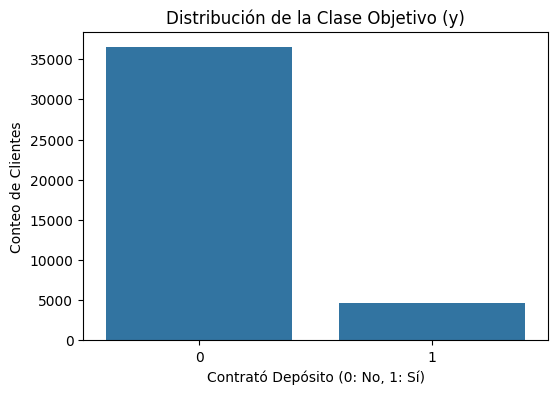

In [666]:
plt.figure(figsize=(6, 4))
sns.countplot(x='y', data=df)
plt.title('Distribución de la Clase Objetivo (y)')
plt.xlabel('Contrató Depósito (0: No, 1: Sí)')
plt.ylabel('Conteo de Clientes')
plt.show()

Encontramos que tenemos un desbalance en nuestro target, con un 88.73% para nuestra clase "no" y un 11.26% para nuestra clase "yes"

### Analisis de variables numericas

Variables: age, emp.var.rate, cons.price.idx, cons.conf.idx, euribor3m

### Correlacion de variables con nuestro traget y

#### Matriz de correlacion

In [667]:
columnas_numericas = [
    'age', 'emp.var.rate', 'cons.price.idx', 
    'cons.conf.idx', 'euribor3m', 'y']

In [668]:
matriz_correlacion = df[columnas_numericas].corr()

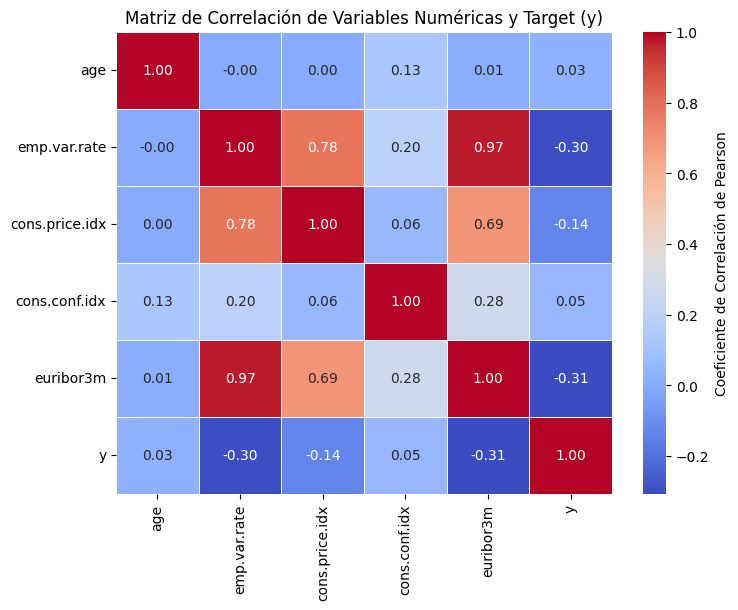

In [669]:
plt.figure(figsize=(8, 6))
sns.heatmap(
    matriz_correlacion, 
    annot=True, 
    cmap='coolwarm', 
    fmt=".2f",
    linewidths=.5, 
    cbar_kws={'label': 'Coeficiente de Correlación de Pearson'}
)
plt.title('Matriz de Correlación de Variables Numéricas y Target (y)')
plt.show()

#### Observacion: 

Segun nuestra matriz de correlacion, nos esta mostrando una fuerte correlacion entre 3 variables predictoras, las cuales son:
- emp.var.rate y euribor3m
- emp.var.rate y cons.pric.idx

Por lo cual vamosa  proceder a eliminar la variable emp.var.rate para solucionar nuestra posible multicolinialidad

In [670]:
df.drop(['emp.var.rate'], axis=1, inplace=True)

In [671]:
df

,age,marital,education,housing,loan,cons.price.idx,cons.conf.idx,euribor3m,y,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed
0,56,0,1,0.0,0.0,93.994,-36.4,4.857,0,False,...,False,False,True,False,False,False,True,False,False,False
1,57,0,4,0.0,0.0,93.994,-36.4,4.857,0,False,...,False,False,True,False,False,False,True,False,False,False
2,37,0,4,1.0,0.0,93.994,-36.4,4.857,0,False,...,False,False,True,False,False,False,True,False,False,False
3,40,0,2,0.0,0.0,93.994,-36.4,4.857,0,False,...,False,False,True,False,False,False,True,False,False,False
4,56,0,4,0.0,1.0,93.994,-36.4,4.857,0,False,...,False,False,True,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,0,5,1.0,0.0,94.767,-50.8,1.028,1,False,...,False,False,False,True,False,False,False,False,False,False
41184,46,0,5,0.0,0.0,94.767,-50.8,1.028,0,True,...,False,False,False,True,False,False,False,False,False,False
41185,56,0,6,1.0,0.0,94.767,-50.8,1.028,0,False,...,False,False,False,True,False,False,False,False,False,False
41186,44,0,5,0.0,0.0,94.767,-50.8,1.028,1,False,...,False,False,False,True,False,False,False,False,False,False


### Analisis de Variables Categoricas

Variables a Analizar: job, marital, education, housing, loan, month, day_of_week.

#### Cálculo de la Tasa de Conversión

In [672]:
variables_analisis = [
    'marital', 'education', 'housing', 'loan']

/tmp/ipykernel_1341/494202562.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tasa_conversion.index, y=tasa_conversion.values, palette="viridis")
/tmp/ipykernel_1341/494202562.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tasa_conversion.index, y=tasa_conversion.values, palette="viridis")
/tmp/ipykernel_1341/494202562.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tasa_conversion.index, y=tasa_conversion.values, palette="viridis")
/tmp/ipykernel_1341/494202562.py:7: FutureWarning: 

Passing `palette` without assigning `h

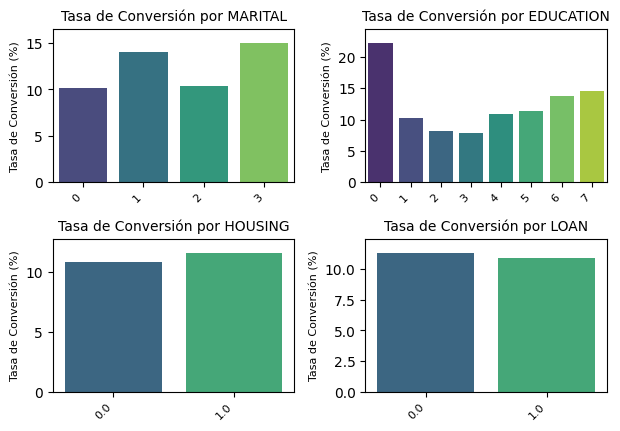

In [673]:
for i, col in enumerate(variables_analisis):
    # Asegurarse de que el DataFrame en uso se llama 'df' (como en tu traza de error)
    tasa_conversion = df.groupby(col)['y'].mean().sort_values(ascending=False)
    tasa_conversion = tasa_conversion * 100 # Para mostrar en porcentaje

    plt.subplot(2, 2, i + 1)
    sns.barplot(x=tasa_conversion.index, y=tasa_conversion.values, palette="viridis")
    
    plt.title(f'Tasa de Conversión por {col.upper()}', fontsize=10)
    plt.ylabel('Tasa de Conversión (%)', fontsize=8)
    plt.xlabel('')
    plt.xticks(rotation=45, ha='right', fontsize=8)
    plt.ylim(0, max(tasa_conversion.values) * 1.1)
    
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

#### Observaciones:

1. Marital (Estado Civil)
Mayor Tasa de Éxito: unknown (desconocido) tiene la mayor tasa de conversión (cerca del 15%). Esto puede ser un artefacto del dato, o sugiere que el banco concentra sus esfuerzos en perfiles incompletos.

Perfiles de Éxito: single (soltero) tiene una tasa alta (cerca del 14%), seguido por divorced (divorciado) y married (casado), que tienen tasas similares y más bajas (cerca del 10%).

Insight: Los clientes solteros o con estado civil desconocido muestran una mayor propensión a contratar, posiblemente por mayor liquidez o menor dependencia financiera compartida.

2. Education (Nivel de Educación)
Mayor Tasa de Éxito: La categoría 0 (que en nuestra codificación manual correspondía a illiterate o analfabeto) muestra una tasa de conversión excepcionalmente alta (más del 20%). Esto es atípico.

Revisión Necesaria: Este resultado suele ser un indicador de que esa categoría tiene muy pocos registros. Debes revisar el conteo de la categoría "0" en education. Si son pocos, el resultado es poco fiable.

Tendencia General: Si ignoramos el pico atípico, la tendencia del 1 al 7 muestra un aumento en la tasa de conversión. Los niveles de educación más altos (códigos 6 y 7, que corresponden a university.degree y unknown) tienen tasas más altas (12-14%) que los niveles intermedios (códigos 1 a 4, tasas del 8-10%).

Insight: En general, la mayor educación se asocia con una mayor propensión a contratar, lo que sugiere una mejor cultura financiera (si se descarta el pico del código 0).

3. Housing y Loan (Préstamos)
Housing (Vivienda): La tasa de conversión es prácticamente idéntica (alrededor del 11%) para clientes con préstamo de vivienda (1.0) y sin préstamo de vivienda (0.0).

Insight: A diferencia de la intuición inicial, tener un préstamo de vivienda no afecta negativamente (o positivamente) la decisión de contratar un depósito.

Loan (Personal): Al igual que housing, la tasa de conversión es idéntica (alrededor del 11%) para clientes con (1.0) y sin (0.0) préstamo personal.

Insight: Los préstamos personales tampoco son un factor diferenciador clave para el éxito en esta campaña.

#### Analizaremos la variable "education" para asegurarnos de que nuestro resultado en la clase "0" sea correcta

In [674]:
conteo_cero = df[df['education'] == 0].shape[0]

In [675]:
exitos_cero = df[(df['education'] == 0) & (df['y'] == 1)].shape[0]

if conteo_cero > 0:
    tasa_real = (exitos_cero / conteo_cero) * 100
else:
    tasa_real = 0

In [676]:
print("--- Revisión de la Categoría 'education' = 0 (Illiterate) ---")
print(f"Conteo total de registros con education = 0: {conteo_cero}")
print(f"Conteo de éxitos (y=1) en esta categoría: {exitos_cero}")
print(f"Tasa de Conversión Verificada: {tasa_real:.2f}%")
print("-" * 50)

--- Revisión de la Categoría 'education' = 0 (Illiterate) ---
Conteo total de registros con education = 0: 18
Conteo de éxitos (y=1) en esta categoría: 4
Tasa de Conversión Verificada: 22.22%
--------------------------------------------------


In [677]:
print("Conteo Absoluto de TODAS las Categorías de Education:")
print(df['education'].value_counts().sort_index())

Conteo Absoluto de TODAS las Categorías de Education:
education
0       18
1     4176
2     2291
3     6045
4     9512
5     5240
6    12164
7     1730
Name: count, dtype: int64


Agrupamos la categoria "0" de nuestra variable education con la categoria "7" de la misma variable, ya que ambas representan informacion no estándar o de calidad dudosa

In [678]:
df['education'] = df['education'].replace(0, 7)

## Paso 6: Split 80/20

In [679]:
X = df.drop('y', axis=1)
y = df['y']


X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42,
    stratify=y
)

In [680]:
columnas_con_nan = X_train.columns
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

In [681]:
X_train_imputado = pd.DataFrame(
    imputer.fit_transform(X_train), 
    columns=columnas_con_nan, 
    index=X_train.index)

X_test_imputado = pd.DataFrame(
    imputer.transform(X_test), 
    columns=columnas_con_nan, 
    index=X_test.index)

### Escalado de variables

In [682]:
columnas_a_escalar = [
    'age', 'cons.price.idx', 
    'cons.conf.idx', 'euribor3m']

In [683]:
scaler = StandardScaler()
X_train[columnas_a_escalar] = scaler.fit_transform(X_train_imputado[columnas_a_escalar])
X_test[columnas_a_escalar] = scaler.transform(X_test_imputado[columnas_a_escalar])

## Paso 7: Modelado

In [684]:
log_model = LogisticRegression(
    solver='liblinear',
    random_state=42, 
    class_weight='balanced')

In [685]:
log_model.fit(X_train_imputado, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,42
,solver,'liblinear'
,max_iter,100
,multi_class,'deprecated'


## Paso 8: Metricas

In [687]:
y_pred = log_model.predict(X_test_imputado)
y_pred_proba = log_model.predict_proba(X_test_imputado)[:, 1]

### Matriz de confusion

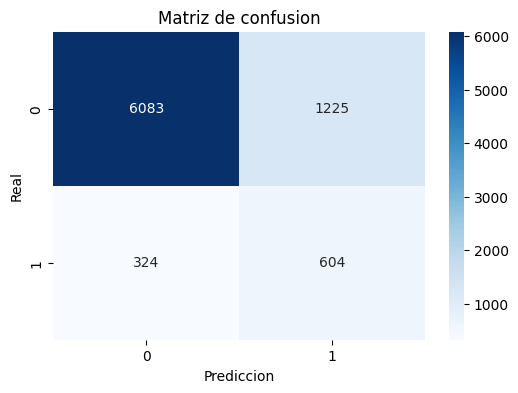

In [693]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Prediccion')
plt.ylabel('Real')
plt.title('Matriz de confusion')
plt.show()

#### Analisis de la matriz de confusion

VN (6083): Clientes que no iban a contratar y el modelo predijo correctamente que no lo harían. ¡Muy bien!

FP (1225): Clientes que no contrataron, pero el modelo predijo incorrectamente que sí lo harían. Esto representa un coste por llamadas innecesarias (falsas alarmas).

FN (324): Clientes que sí contrataron, pero el modelo predijo incorrectamente que no lo harían. Este es el coste de oportunidad perdida (perdiste la venta).

VP (604): Clientes que sí contrataron y el modelo predijo correctamente que lo harían. 

¡Objetivo cumplido!

### Reporte de clasificacion

In [697]:
report = pd.DataFrame.from_dict(classification_report(y_test, y_pred, output_dict=True)).transpose()
report

,precision,recall,f1-score,support
0,0.949430,0.832375,0.887058,7308.000000
1,0.330235,0.650862,0.438157,928.000000
accuracy,0.811923,0.811923,0.811923,0.811923
macro avg,0.639833,0.741619,0.662608,8236.000000
weighted avg,0.879662,0.811923,0.836478,8236.000000


#### Analisis del reporte de clasificacion

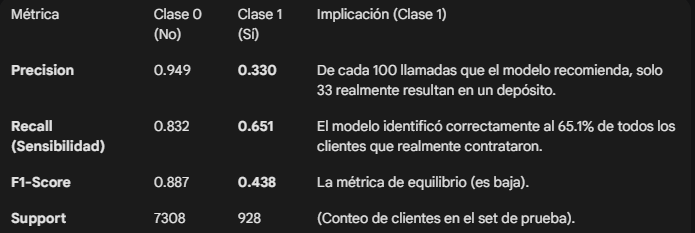

In [699]:
roc_auc = roc_auc_score(y_test, y_pred_proba)
roc_auc

0.7923779797293472

#### Conclusiones del Modelo Inicial

Recall Razonable (65.1%): El modelo, gracias al parámetro class_weight='balanced', es relativamente bueno para encontrar a los clientes que SÍ van a contratar (VP=604).

Baja Precisión (33.0%): La Precisión es baja. El modelo genera muchos Falsos Positivos (FP=1225). Esto significa que estás llamando a muchos clientes equivocados, lo que aumenta el coste operativo y la frustración del cliente.

Rendimiento General (AUC ≈ 0.79): Un AUC de 0.7924 es bastante bueno. Sugiere que el modelo tiene una capacidad aceptable para diferenciar entre un cliente de éxito y uno de fracaso.

Decisión del Negocio: Depende del objetivo. Si el objetivo es Maximizar Ventas a toda costa (tolerando el coste de llamadas erróneas), el Recall es aceptable. Si el objetivo es la Eficiencia Operativa (minimizar llamadas erróneas), la Precisión (0.33) debe ser mejorada.

### Interpretación de Coeficientes (Factores Clave)

In [700]:
coeficientes = pd.Series(log_model.coef_[0], index=X_train_imputado.columns)

coeficientes_ordenados = coeficientes.sort_values(ascending=False)

In [701]:
print("\n--- Coeficientes de Regresión Logística (Importancia de Variables) ---")
print(coeficientes_ordenados.head(10))
print("-" * 30)
print(coeficientes_ordenados.tail(10))


--- Coeficientes de Regresión Logística (Importancia de Variables) ---
month_mar          1.187432
month_oct          0.874543
month_dec          0.552075
month_jul          0.512687
job_student        0.368219
job_retired        0.363921
month_sep          0.239232
month_jun          0.201546
day_of_week_wed    0.128406
cons.price.idx     0.084130
dtype: float64
------------------------------
job_technician      -0.052711
housing             -0.059914
job_self-employed   -0.077739
job_housemaid       -0.084066
day_of_week_mon     -0.104901
job_unemployed      -0.146246
job_services        -0.155886
job_blue-collar     -0.169316
euribor3m           -0.553496
month_may           -0.706036
dtype: float64


### Interpretación de los Coeficientes (Factores de Éxito)


Los coeficientes nos indican cómo cada variable afecta la probabilidad de que un cliente contrate el depósito (y=1). 

Un coeficiente positivo alto aumenta la probabilidad, y un coeficiente negativo alto la disminuye.

### Optimización del Umbral de Decisión

In [ ]:
precision, recall, umbrales = precision_recall_curve(y_test, y_pred_proba)

fscores = (2 * precision * recall) / (precision + recall)

indice_max_fscore = np.argmax(fscores)
mejor_fscore = fscores[indice_max_fscore]
mejor_umbral = umbrales[indice_max_fscore]

print("--- Optimización del Umbral ---")
print(f"Mejor F1-Score encontrado: {mejor_fscore:.4f}")
print(f"Mejor Umbral de Decisión: {mejor_umbral:.4f}")
print("-" * 30)


y_pred_optimizada = (y_pred_proba >= mejor_umbral).astype(int)

from sklearn.metrics import classification_report

print("--- Reporte de Clasificación con Umbral Optimizado ---")
print(classification_report(y_test, y_pred_optimizada))

--- Optimización del Umbral ---
Mejor F1-Score encontrado: 0.4964
Mejor Umbral de Decisión: 0.6479
------------------------------
--- Reporte de Clasificación con Umbral Optimizado ---
              precision    recall  f1-score   support

           0       0.94      0.91      0.93      7308
           1       0.44      0.56      0.50       928

    accuracy                           0.87      8236
   macro avg       0.69      0.74      0.71      8236
weighted avg       0.89      0.87      0.88      8236



### Conclusion Operativa:



El nuevo umbral de 0.6479 es mucho más eficiente para el negocio:

Menos Llamadas Desperdiciadas (Mejor Precisión): Ahora, de cada 100 clientes que el modelo recomienda llamar, 44 realmente contratarán (antes eran solo 33). Esto reduce significativamente los costes operativos y la sobrecarga del equipo de telemarketing.

Eficiencia Equilibrada (Mejor F1-Score): El F1-Score pasó de 0.438 a 0.496, lo que confirma que encontraste un mejor equilibrio entre la precisión de las llamadas y la identificación de clientes potenciales (recall).

Compromiso Aceptable de Recall: Aunque perdiste 9 puntos de recall (ahora solo identificas al 56% de los que SI contratan, en lugar del 65%), la ganancia de 11 puntos en precisión es, en general, mucho más valiosa para un centro de llamadas, ya que maximiza la eficiencia.